<a href="https://colab.research.google.com/github/CodyByre/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/Cody_Byre_DS_Unit_1_Sprint_Challenge_1_ipynb_txt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 1

## Loading, cleaning, visualizing, and analyzing data

In this sprint challenge you will look at a dataset of the survival of patients who underwent surgery for breast cancer.

http://archive.ics.uci.edu/ml/datasets/Haberman%27s+Survival

Data Set Information:
The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

Attribute Information:
1. Age of patient at time of operation (numerical)
2. Patient's year of operation (year - 1900, numerical)
3. Number of positive axillary nodes detected (numerical)
4. Survival status (class attribute)
-- 1 = the patient survived 5 years or longer
-- 2 = the patient died within 5 year

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- Validate that you have no missing values.
- Add informative names to the features.
- The survival variable is encoded as 1 for surviving >5 years and 2 for not - change this to be 0 for not surviving and 1 for surviving >5 years (0/1 is a more traditional encoding of binary variables)

At the end, print the first five rows of the dataset to demonstrate the above.

In [0]:
import pandas as pd
import numpy as np

In [0]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data'
df = pd.read_csv(url)

In [33]:
#Validate that it has the appropriate number of observations (you can check the 
#raw file, and also read the dataset description from UCI).
df.shape

(305, 4)

In [34]:
df

,30,64,1,1.1
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1
...,...,...,...,...
300,75,62,1,1
301,76,67,0,1
302,77,65,3,1
303,78,65,1,2


In [0]:
#UCI says 306 instances with 3 atrributes. There are 4 columns because of the
#index and only 305 rows because column names must be added.

In [0]:
#Add informative names to the features.
df.columns = ['Age', 'Year', 'Nodes', 'Survived']

In [39]:
df.head()

,Age,Year,Nodes,Survived
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


In [40]:
#Validate that you have no missing values.
df.isnull().sum()

Age         0
Year        0
Nodes       0
Survived    0
dtype: int64

In [41]:
df.dtypes[0:4]

Age         int64
Year        int64
Nodes       int64
Survived    int64
dtype: object

In [0]:
#The survival variable is encoded as 1 for surviving >5 years and 2 for not - 
#change this to be 0 for not surviving and 1 for surviving >5 years 
#(0/1 is a more traditional encoding of binary variables)

In [0]:
df['Survived'] = df['Survived'].map({1: 0, 2: 1})

In [44]:
df.head()

,Age,Year,Nodes,Survived
0,30,62,3,0
1,30,65,0,0
2,31,59,2,0
3,31,65,4,0
4,33,58,10,0


## Part 2 - Examine the distribution and relationships of the features

Explore the data - create at least *2* tables (can be summary statistics or crosstabulations) and *2* plots illustrating the nature of the data.

This is open-ended, so to remind - first *complete* this task as a baseline, then go on to the remaining sections, and *then* as time allows revisit and explore further.

Hint - you may need to bin some variables depending on your chosen tables/plots.

In [46]:
df.describe()

,Age,Year,Nodes,Survived
count,305.000000,305.000000,305.000000,305.000000
mean,52.531148,62.849180,4.036066,0.265574
std,10.744024,3.254078,7.199370,0.442364
min,30.000000,58.000000,0.000000,0.000000
25%,44.000000,60.000000,0.000000,0.000000
50%,52.000000,63.000000,1.000000,0.000000
75%,61.000000,66.000000,4.000000,1.000000
max,83.000000,69.000000,52.000000,1.000000


In [115]:
AS = pd.crosstab(df['Survived'], df['Age'])
AS

Age,30,31,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,83
Survived,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,2,2,2,5,2,2,6,9,5,3,7,7,7,4,6,3,8,4,8,10,4,10,5,9,8,5,8,7,7,4,6,4,7,5,6,3,4,2,3,5,1,3,2,1,1,1,1,0,0
1,0,0,0,2,0,0,0,1,1,0,3,2,4,3,3,4,3,3,2,2,2,4,6,4,2,2,3,0,1,2,3,3,1,0,4,2,2,0,1,2,0,1,0,1,0,0,0,1,1


In [117]:
NS = pd.crosstab(df['Survived'], df['Nodes'])
NS


Nodes,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,28,30,35,46,52
Survived,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,117,32,15,13,10,2,4,5,5,2,2,1,1,1,3,1,1,0,1,1,1,0,2,0,0,1,1,1,0,1,0
1,19,8,5,7,3,4,3,2,2,4,1,3,1,4,1,2,0,1,0,2,1,1,1,3,1,0,0,0,1,0,1


In [118]:
YS = pd.crosstab(df['Survived'], df['Year'])
YS

Year,58,59,60,61,62,63,64,65,66,67,68,69
Survived,,,,,,,,,,,,
0,24,18,24,23,16,22,22,15,22,21,10,7
1,12,9,4,3,7,8,8,13,6,4,3,4


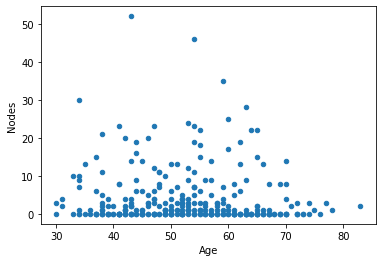

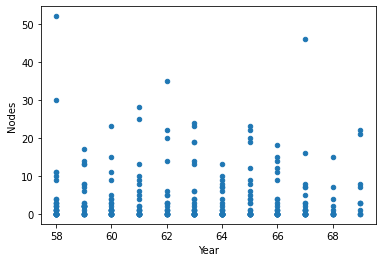

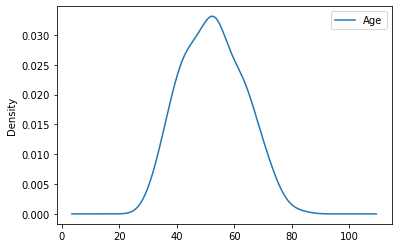

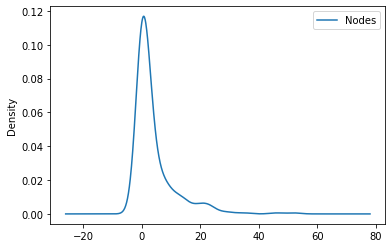

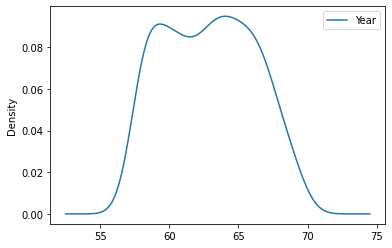

In [119]:
df.plot(x='Age', y='Nodes', kind='scatter')
df.plot(x='Year', y='Nodes', kind='scatter')
df.plot(x='Survived', y='Age', kind='kde')
df.plot(x='Survived', y='Nodes', kind='kde')
df.plot(x='Survived', y='Year', kind='kde');

In [0]:
import seaborn as sb

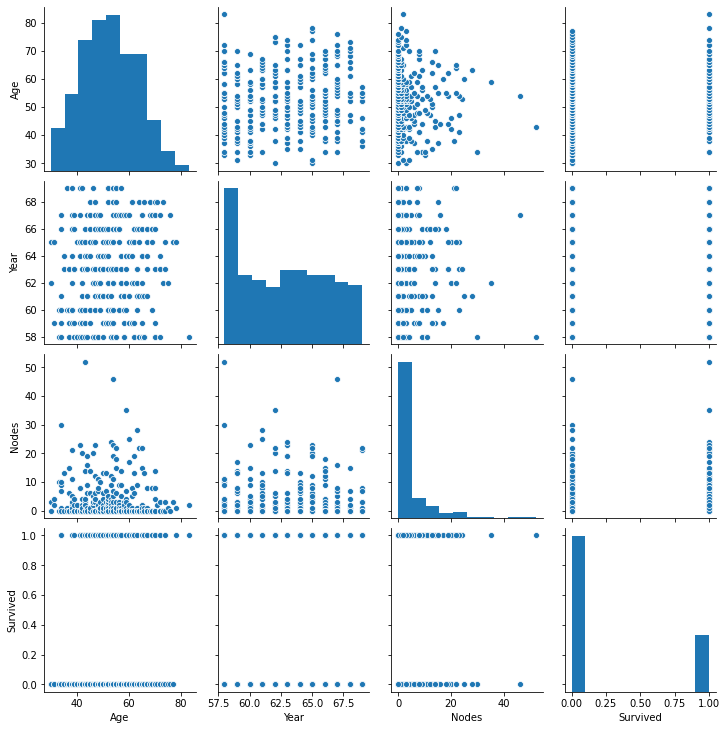

In [54]:
sb.pairplot(df)

## Part 3 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- What is at least one feature that looks to have a positive relationship with survival?
- What is at least one feature that looks to have a negative relationship with survival?
- How are those two features related with each other, and what might that mean?

Answer with text, but feel free to intersperse example code/results or refer to it from earlier.

It isn't linear, but year of surgery appears to be the only feature that shows any positive correlation with survival. After each of the first two years, where 1/3 die, there is a sharp decline for '60 and '61, where only 4/28 and 3/26 die, respectively. It does pick back up and has a large, potentially outlier spike in '65 where there are more deaths than survivors (15/28). Then in '69 it approaches early-study ratios (4/11).

In [111]:
YS

Year,58,59,60,61,62,63,64,65,66,67,68,69
Survived,,,,,,,,,,,,
0,24,18,24,23,16,22,22,15,22,21,10,7
1,12,9,4,3,7,8,8,13,6,4,3,4


*Nodes appear to have a negative relationship with survival rate. Anything over 0 and the survival rate drops significantly, though it isn't completely linear. Age also has a negative relationship, as only 4 deaths vs 38 survivors between age 30-40, but after that, age 41 has 3 deaths vs 7 survivors, age 46 has more deaths than survivors, and the two oldest both died, aged 78 and 83.*

In [109]:
NS

Nodes,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,28,30,35,46,52
Survived,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,117,32,15,13,10,2,4,5,5,2,2,1,1,1,3,1,1,0,1,1,1,0,2,0,0,1,1,1,0,1,0
1,19,8,5,7,3,4,3,2,2,4,1,3,1,4,1,2,0,1,0,2,1,1,1,3,1,0,0,0,1,0,1


In [110]:
AS

Age,30,31,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,83
Survived,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,2,2,2,5,2,2,6,9,5,3,7,7,7,4,6,3,8,4,8,10,4,10,5,9,8,5,8,7,7,4,6,4,7,5,6,3,4,2,3,5,1,3,2,1,1,1,1,0,0
1,0,0,0,2,0,0,0,1,1,0,3,2,4,3,3,4,3,3,2,2,2,4,6,4,2,2,3,0,1,2,3,3,1,0,4,2,2,0,1,2,0,1,0,1,0,0,0,1,1
